**Data Exploration**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nfl_drives = pd.read_csv('NFL_Drive_by_Drive_Data.csv')
nfl_drives.head()

,Season,GameID,Drive,n.sacks,n.completions,n.incompletions,n.stuffed.runs,n.positive.runs,n.negative.plays,n.fumbles,first.downs.gained,third.downs.converted,takeaway.nonscore,turnover.nonscore,punt.safety,pts.scored,ST.return.yards.net,off.ST.start.pos,off.ST.yards.gained
0,2009,2009091000,1,0,1,0,1,0,1,0,0,0,0.0,0.0,1,0,24.0,58.0,48.0
1,2009,2009091000,2,0,1,0,2,0,1,0,0,0,0.0,0.0,1,0,-2.0,98.0,-4.0
2,2009,2009091000,3,1,3,0,1,0,2,0,1,0,0.0,0.0,1,0,-19.0,43.0,-38.0
3,2009,2009091000,4,0,1,0,0,2,0,0,2,0,0.0,1.0,0,0,37.0,89.0,107.0
4,2009,2009091000,5,1,0,0,0,2,1,0,0,0,0.0,0.0,1,0,-9.0,73.0,-18.0


In [ ]:
## View the frequency of unique points scored
#nfl_drives['pts.scored'].value_counts()

## Create a variable "Off_Scored" (did offense score or not?)
## 1 if the offense scored, 0 otherwise
nfl_drives['Off_Scored'] = np.where(nfl_drives['pts.scored'] > 0, 1, 0)

## Dropping unnecessary features
nfl_drives.drop(['pts.scored', 'Season', 'GameID', 'Drive',
                 'turnover.nonscore', 'takeaway.nonscore', 'punt.safety'],
                axis='columns', inplace=True)

## Dropping features with missing values
nfl_drives.drop(['ST.return.yards.net', 'off.ST.start.pos', 'off.ST.yards.gained'],
                axis='columns', inplace=True)

In [ ]:
## Check for missing values
np.sum(nfl_drives.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
n.sacks,0
n.completions,0
n.incompletions,0
n.stuffed.runs,0
n.positive.runs,0
n.negative.plays,0
n.fumbles,0
first.downs.gained,0
third.downs.converted,0
Off_Scored,0


In [ ]:
## Class count
nfl_drives['Off_Scored'].value_counts()

,count
Off_Scored,
0,35198
1,17930


**Training and Test Set**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X = nfl_drives.drop('Off_Scored', axis='columns')
y = nfl_drives['Off_Scored']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**1. Logistic Regression (Benchmark)**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

print("Accuracy:", log_model.score(X_test, y_test))

Accuracy: 0.785122722481554


F1 score for Logistic Regression

In [ ]:
from sklearn.metrics import f1_score

log_pred = log_model.predict(X_test)
print("F1 score:", f1_score(y_test, log_pred))

F1 score: 0.6470442740539204


**2. Neural Network Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

NN_model = Sequential()
NN_model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
NN_model.add(Dense(10, activation='relu'))
NN_model.add(Dense(10, activation='relu'))
NN_model.add(Dense(10, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))

NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model on training data
NN_model.fit(X_train, y_train, epochs=10, batch_size=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7729 - loss: 0.4999
Epoch 2/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7876 - loss: 0.4606
Epoch 3/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7910 - loss: 0.4537
Epoch 4/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7919 - loss: 0.4539
Epoch 5/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7943 - loss: 0.4537
Epoch 6/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7884 - loss: 0.4580
Epoch 7/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7884 - loss: 0.4584
Epoch 8/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7914 - loss: 0.4556
Epoch 9/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7890 - loss: 0.4583
Epoch 10/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7904 - loss: 0.4587


Plotting Accuracy

Epoch 1/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7925 - loss: 0.4552 - val_accuracy: 0.7870 - val_loss: 0.4573
Epoch 2/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7910 - loss: 0.4546 - val_accuracy: 0.7908 - val_loss: 0.4567
Epoch 3/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7962 - loss: 0.4500 - val_accuracy: 0.7903 - val_loss: 0.4577
Epoch 4/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7952 - loss: 0.4518 - val_accuracy: 0.7891 - val_loss: 0.4571
Epoch 5/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7932 - loss: 0.4521 - val_accuracy: 0.7875 - val_loss: 0.4571
Epoch 6/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7892 - loss: 0.4589 - val_accuracy: 0.7906 - val_loss: 0.4558
Epoch 7/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7884 - loss: 0.4602 - val_accuracy: 0.7900 - val_loss: 0.4570
Epoch 8/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7895 - loss: 0.45

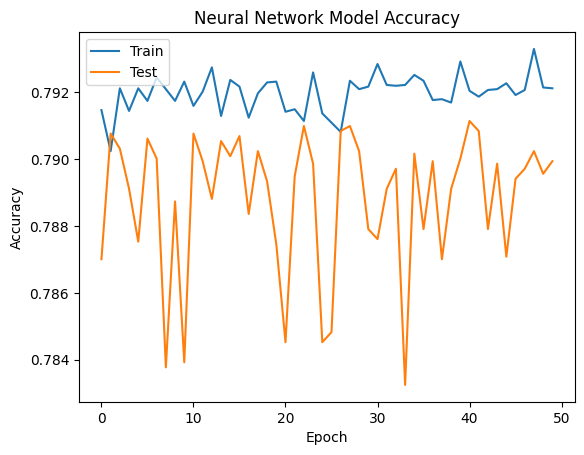

In [ ]:
# Fit the model with 50 epochs and store the history
history = NN_model.fit(X_train, y_train, epochs=50, batch_size=10,
                       validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Test Accuracy for NN model

In [ ]:
scores_NN = NN_model.evaluate(X_test, y_test)

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7894 - loss: 0.4584


F1 score for NN model

In [ ]:
NN_pred = np.round(NN_model.predict(X_test)).astype(int)
print("F1 score:", f1_score(y_test, NN_pred))

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 score: 0.6579139314369074


**3. Convolutional Neural Network**

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(15, activation='relu'))
CNN_model.add(Dense(1, activation='sigmoid'))

CNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model on training data
CNN_model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7740 - loss: 0.4946
Epoch 2/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7834 - loss: 0.4690
Epoch 3/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7868 - loss: 0.4657
Epoch 4/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7833 - loss: 0.4668
Epoch 5/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7919 - loss: 0.4590
Epoch 6/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7904 - loss: 0.4614
Epoch 7/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7883 - loss: 0.4601
Epoch 8/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7873 - loss: 0.4618
Epoch 9/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7889 - loss: 0.4597
Epoch 10/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7892 - loss: 0.4582


Plotting Accuracy

Epoch 1/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7885 - loss: 0.4613 - val_accuracy: 0.7851 - val_loss: 0.4629
Epoch 2/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7914 - loss: 0.4585 - val_accuracy: 0.7882 - val_loss: 0.4591
Epoch 3/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7902 - loss: 0.4574 - val_accuracy: 0.7878 - val_loss: 0.4596
Epoch 4/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7876 - loss: 0.4599 - val_accuracy: 0.7885 - val_loss: 0.4586
Epoch 5/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7911 - loss: 0.4574 - val_accuracy: 0.7856 - val_loss: 0.4653
Epoch 6/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7899 - loss: 0.4568 - val_accuracy: 0.7886 - val_loss: 0.4600
Epoch 7/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7894 - loss: 0.4582 - val_accuracy: 0.7870 - val_loss: 0.4606
Epoch 8/50
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7887 - loss: 0.4617 -

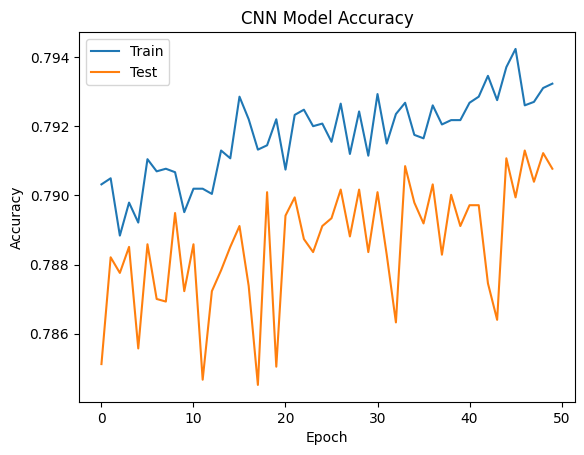

In [ ]:
# Fit the CNN model with 50 epochs and store the history
history_cnn = CNN_model.fit(X_train, y_train, epochs=50, batch_size=10,
                            validation_data=(X_test, y_test))

# Plot training & validation accuracy values for CNN
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Test Accuracy of CNN

In [ ]:
scores_CNN = CNN_model.evaluate(X_test, y_test)

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7917 - loss: 0.4575


F1 Score for CNN

In [ ]:
CNN_pred = np.round(CNN_model.predict(X_test)).astype(int)
print("F1 score:", f1_score(y_test, CNN_pred))

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 score: 0.6662663624354509


**SMOTE for Imbalanced Classes**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

**4. Neural Network Model (w/ SMOTE)**

In [ ]:
NN_model_sm = Sequential()
NN_model_sm.add(Dense(10, input_dim=X.shape[1], activation='relu'))
NN_model_sm.add(Dense(10, activation='relu'))
NN_model_sm.add(Dense(10, activation='relu'))
NN_model_sm.add(Dense(10, activation='relu'))
NN_model_sm.add(Dense(1, activation='sigmoid'))

NN_model_sm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model on training data
NN_model_sm.fit(X_train_sm, y_train_sm, epochs=10, batch_size=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5291/5291 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7418 - loss: 0.5269
Epoch 2/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7652 - loss: 0.4929
Epoch 3/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7629 - loss: 0.4948
Epoch 4/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7649 - loss: 0.4905
Epoch 5/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7623 - loss: 0.4936
Epoch 6/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7648 - loss: 0.4921
Epoch 7/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7636 - loss: 0.4898
Epoch 8/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7652 - loss: 0.4914
Epoch 9/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7663 - loss: 0.4879
Epoch 10/10
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7644 - loss: 0.4909


Plotting Accuracy

Epoch 1/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7677 - loss: 0.4846 - val_accuracy: 0.7725 - val_loss: 0.4933
Epoch 2/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7655 - loss: 0.4896 - val_accuracy: 0.7686 - val_loss: 0.4873
Epoch 3/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7659 - loss: 0.4872 - val_accuracy: 0.7630 - val_loss: 0.4983
Epoch 4/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7677 - loss: 0.4867 - val_accuracy: 0.7656 - val_loss: 0.4978
Epoch 5/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7671 - loss: 0.4875 - val_accuracy: 0.7695 - val_loss: 0.4846
Epoch 6/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7668 - loss: 0.4870 - val_accuracy: 0.7614 - val_loss: 0.5053
Epoch 7/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7668 - loss: 0.4840 - val_accuracy: 0.7841 - val_loss: 0.4697
Epoch 8/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7646 - loss: 0

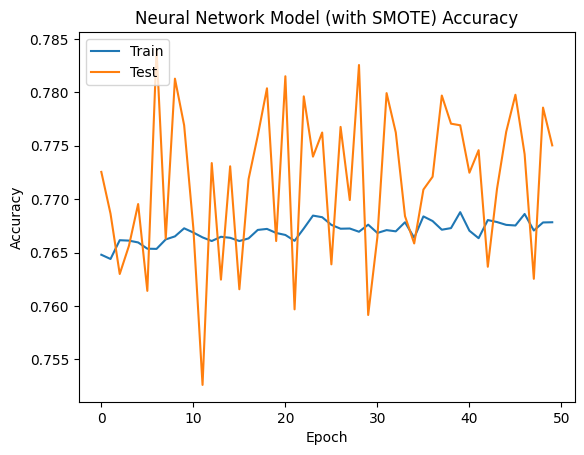

In [ ]:
# Fit NN_model_sm with 50 epochs and store the history
history_sm = NN_model_sm.fit(X_train_sm, y_train_sm, epochs=50, batch_size=10,
                       validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history_sm.history['accuracy'])
plt.plot(history_sm.history['val_accuracy'])
plt.title('Neural Network Model (with SMOTE) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Test Accuracy of NN model with SMOTE

In [ ]:
scores_NN_sm = NN_model_sm.evaluate(X_test, y_test)

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7768 - loss: 0.4747


F1 Score of NN model with SMOTE

In [ ]:
NN_sm_pred = np.round(NN_model_sm.predict(X_test)).astype(int)
print("F1 score:", f1_score(y_test, NN_sm_pred))

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1 score: 0.6898011002962336


**5. Convolutional Neural Network (w/ SMOTE)**

In [ ]:
CNN_model_sm = Sequential()
CNN_model_sm.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)))
CNN_model_sm.add(MaxPooling1D(pool_size=2))
CNN_model_sm.add(Flatten())
CNN_model_sm.add(Dense(15, activation='relu'))
CNN_model_sm.add(Dense(1, activation='sigmoid'))

CNN_model_sm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model on training data
CNN_model_sm.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7723 - loss: 0.4952
Epoch 2/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7865 - loss: 0.4661
Epoch 3/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7893 - loss: 0.4591
Epoch 4/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7874 - loss: 0.4660
Epoch 5/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7869 - loss: 0.4657
Epoch 6/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7869 - loss: 0.4628
Epoch 7/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7894 - loss: 0.4609
Epoch 8/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7919 - loss: 0.4578
Epoch 9/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7908 - loss: 0.4603
Epoch 10/10
3985/3985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7885 - loss: 0.4601


Plotting Accuracy

Epoch 1/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7625 - loss: 0.4947 - val_accuracy: 0.7773 - val_loss: 0.4869
Epoch 2/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7649 - loss: 0.4892 - val_accuracy: 0.7689 - val_loss: 0.4946
Epoch 3/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7643 - loss: 0.4924 - val_accuracy: 0.7657 - val_loss: 0.4974
Epoch 4/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7639 - loss: 0.4896 - val_accuracy: 0.7651 - val_loss: 0.5027
Epoch 5/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7641 - loss: 0.4944 - val_accuracy: 0.7811 - val_loss: 0.4794
Epoch 6/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7620 - loss: 0.4897 - val_accuracy: 0.7674 - val_loss: 0.4971
Epoch 7/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7640 - loss: 0.4899 - val_accuracy: 0.7743 - val_loss: 0.4841
Epoch 8/50
5291/5291 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7642 - loss: 0

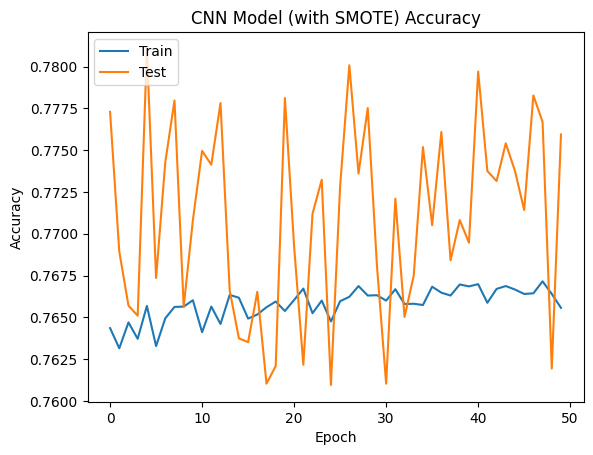

In [ ]:
# Fit CNN_model_sm with 50 epochs and store the history
history_cnn_sm = CNN_model_sm.fit(X_train_sm, y_train_sm, epochs=50, batch_size=10,
                            validation_data=(X_test, y_test))

# Plot training & validation accuracy values for CNN with SMOTE
plt.plot(history_cnn_sm.history['accuracy'])
plt.plot(history_cnn_sm.history['val_accuracy'])
plt.title('CNN Model (with SMOTE) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Test Accuracy of CNN model with SMOTE

In [ ]:
scores_CNN_sm = CNN_model_sm.evaluate(X_test, y_test)

416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7912 - loss: 0.4615


F1 Score of CNN model with SMOTE

In [ ]:
CNN_sm_pred = np.round(CNN_model_sm.predict(X_test)).astype(int)
print("F1 score:", f1_score(y_test, CNN_sm_pred))

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1 score: 0.6702203269367448
